<a href="https://colab.research.google.com/github/depichan18/ad-profit-projection-regression/blob/main/ad_profit_projection_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏭 Predicting Profit from Advertising Spend Using Projection-Based Linear Regression

---

## 📘 Introduction

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. From a linear algebra perspective, linear regression can be interpreted as a **geometric projection** problem.

---

## 📐 Linear Regression Formula

The general form of a simple linear regression model is:

$$
Y = a + bX + \varepsilon
$$

Where:

- $Y$: dependent variable (response)  
- $X$: independent variable (predictor)  
- $a$: intercept (value of $Y$ when $X = 0$)  
- $b$: slope (change in $Y$ per unit change in $X$)  
- $\varepsilon$: error term  

In matrix form:

$$
y = X\beta + \varepsilon
$$

Where:

- $y$: vector of outputs  
- $X$: matrix of inputs  
- $\beta$: vector of coefficients  
- $\varepsilon$: error vector  

---

## 🧮 Linear Regression as a Projection

The goal is to find the **best linear approximation** of $y$ in the column space of $X$ by projecting $y$ onto that space.

The predicted values $\hat{y}$ lie in the subspace spanned by the columns of $X$, and this projection minimizes the squared distance from $y$ to the subspace.

---

## 🧠 Mathematical Formulation

The normal equation gives the regression coefficients:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

The prediction is:

$$
\hat{y} = X \hat{\beta} = X (X^\top X)^{-1} X^\top y
$$

Define the **projection matrix**:

$$
P = X (X^\top X)^{-1} X^\top
$$

Then:

$$
\hat{y} = P y
$$

---

## 📐 Properties of the Projection Matrix

- $P$ is **idempotent**: $P^2 = P$
- $P$ is **symmetric**: $P^\top = P$
- The residual $r = y - \hat{y}$ is **orthogonal** to the column space of $X$:

$$
X^\top r = 0
$$

---

## 🏭 Case Study: Predicting Profit from Advertising Spend

### 📌 Problem

A company wants to understand how advertising spending affects product profit. It collects data from 7 recent campaigns:

| Campaign | Ad Spend ($X$, in \$1,000s) | Profit ($Y$, in \$1,000s) |
|----------|------------------------------|----------------------------|
| A        | 2                            | 65                         |
| B        | 3                            | 70                         |
| C        | 5                            | 75                         |
| D        | 7                            | 85                         |
| E        | 1                            | 60                         |
| F        | 4                            | 72                         |
| G        | 6                            | 78                         |

---

### Step 1: Build Vectors

Let:

- $X$ be the design matrix with intercept
- $y$ be the vector of profits

$$
X =
\begin{bmatrix}
1 & 2 \\\\
1 & 3 \\\\
1 & 5 \\\\
1 & 7 \\\\
1 & 1 \\\\
1 & 4 \\\\
1 & 6
\end{bmatrix},
\quad
y =
\begin{bmatrix}
65 \\\\
70 \\\\
75 \\\\
85 \\\\
60 \\\\
72 \\\\
78
\end{bmatrix}
$$

---

### Step 2: Compute $\hat{\beta}$

Using:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

Compute:

$$
X^\top X =
\begin{bmatrix}
7 & 28 \\
28 & 140
\end{bmatrix},
\quad
X^\top y =
\begin{bmatrix}
505 \\
2065
\end{bmatrix}
$$

Then:

$$
(X^\top X)^{-1} =
\begin{bmatrix}
1.4286 & -0.2857 \\
-0.2857 & 0.0714
\end{bmatrix}
$$

So:

$$
\hat{\beta} =
\begin{bmatrix}
57 \\
3.79
\end{bmatrix}
$$

---

### Step 3: Predict Profits

Use:

$$
\hat{y} = 57 + 3.79x
$$

| Campaign | Ad Spend ($x$) | Predicted Profit ($\hat{y}$) |
|----------|----------------|-------------------------------|
| A        | 2              | 64.58                         |
| B        | 3              | 68.37                         |
| C        | 5              | 76.95                         |
| D        | 7              | 85.53                         |
| E        | 1              | 60.79                         |
| F        | 4              | 72.16                         |
| G        | 6              | 80.74                         |

---

### Step 4: Residuals

Residuals:

$$
r = y - \hat{y}
$$

| Campaign | Actual Profit ($y$) | Predicted ($\hat{y}$) | Residual ($y - \hat{y}$) |
|----------|---------------------|------------------------|---------------------------|
| A        | 65                  | 64.58                  | 0.42                      |
| B        | 70                  | 68.37                  | 1.63                      |
| C        | 75                  | 76.95                  | -1.95                     |
| D        | 85                  | 85.53                  | -0.53                     |
| E        | 60                  | 60.79                  | -0.79                     |
| F        | 72                  | 72.16                  | -0.16                     |
| G        | 78                  | 80.74                  | -2.74                     |

---

### 📈 Final Model

$$
\hat{y} = 57 + 3.79x
$$

---

### 💡 Interpretation

- For each additional **\$1,000 in advertising spend**, the **profit increases by approximately \$3,790**
- The small residuals suggest that the **linear model fits the data well**
- Advertising is a **strong predictor of profit** in this dataset

# 🐍 Implementation of Projection-Based Linear Regression for Predicting Profit from Advertising Spend

In [7]:
import numpy as np

# --- 1. Case Study Data ---
# Ad Spend (independent variable X) and Profit (dependent variable Y)
campaigns = ["A", "B", "C", "D", "E", "F", "G"]
x = [2, 3, 5, 7, 1, 4, 6]      # Ad Spend (in $1,000s)
y = [65, 70, 75, 85, 60, 72, 78]  # Profit (in $1,000s)

# --- 2. Create the Design Matrix ---
X = np.column_stack((np.ones(len(x)), x))  # Add intercept column
y_vec = np.array(y).reshape(-1, 1)

# --- 3. Compute β using Normal Equation ---
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
Xt_y = X.T @ y_vec
beta = XtX_inv @ Xt_y  # Coefficients [intercept, slope]

# --- 4. Compute Predicted y (Projection) and Residuals ---
y_hat = X @ beta
residuals = y_vec - y_hat

# --- 5. Pretty Printer ---
def format_number(val):
    if abs(val - round(val)) < 1e-10:
        return str(int(round(val)))
    else:
        return f"{val:.2f}"

def print_matrix(name, matrix, labels=None):
    print(f"\n{name}:")
    for i, row in enumerate(matrix):
        label = f"{labels[i]}: " if labels else ""
        print(f"{label}[" + "  ".join(format_number(val) for val in row) + "]")

# --- 6. Display Results ---
print_matrix("Design Matrix X", X)
print_matrix("Actual y (Profit)", y_vec, campaigns)
print_matrix("Predicted y (Projection ŷ)", y_hat, campaigns)
print_matrix("Residuals (y - ŷ)", residuals, campaigns)
print_matrix("Beta (Coefficients)", beta)

# --- 7. Model Summary ---
intercept = beta[0, 0]
slope = beta[1, 0]
print(f"\nFinal Regression Equation:")
print(f"ŷ = {format_number(intercept)} + {format_number(slope)} × x (Ad Spend in $1,000s)")
print("\nConclusion:")
print(f"Each additional $1,000 of ad spend is predicted to increase the profit by about {format_number(slope)} thousand dollars.")



Design Matrix X:
[1  2]
[1  3]
[1  5]
[1  7]
[1  1]
[1  4]
[1  6]

Actual y (Profit):
A: [65]
B: [70]
C: [75]
D: [85]
E: [60]
F: [72]
G: [78]

Predicted y (Projection ŷ):
A: [64.57]
B: [68.36]
C: [75.93]
D: [83.50]
E: [60.79]
F: [72.14]
G: [79.71]

Residuals (y - ŷ):
A: [0.43]
B: [1.64]
C: [-0.93]
D: [1.50]
E: [-0.79]
F: [-0.14]
G: [-1.71]

Beta (Coefficients):
[57]
[3.79]

Final Regression Equation:
ŷ = 57 + 3.79 × x (Ad Spend in $1,000s)

Conclusion:
Each additional $1,000 of ad spend is predicted to increase the profit by about 3.79 thousand dollars.


# 📊 Linear Regression: Predicting Profit from Advertising Spend

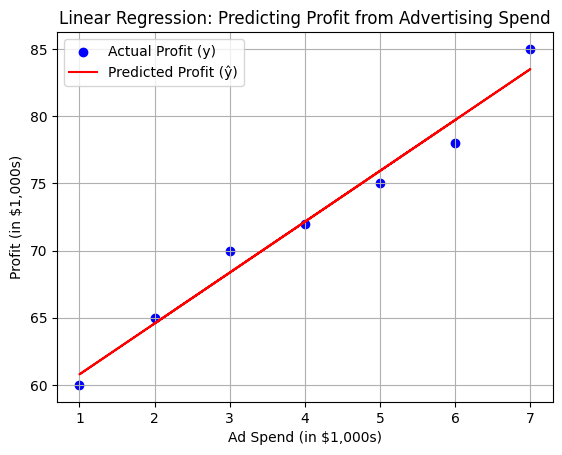

In [8]:
import matplotlib.pyplot as plt

# Flatten vectors for plotting
x = np.array(x)
y_hat_flat = y_hat.flatten()

# Plot
plt.scatter(x, y, label='Actual Profit (y)', color='blue')
plt.plot(x, y_hat_flat, label='Predicted Profit (ŷ)', color='red')
plt.xlabel("Ad Spend (in $1,000s)")
plt.ylabel("Profit (in $1,000s)")
plt.title("Linear Regression: Predicting Profit from Advertising Spend")
plt.grid(True)
plt.legend()
plt.show()



---

## 📎 Notes

- The **projection matrix** $P$ transforms $y$ into the best approximation in the space spanned by $X$
- The **residual vector** is orthogonal to the prediction space
- This approach connects **statistics with linear algebra and geometry**

---

## ✅ Benefits

- **Mathematical Insight**: Visualize regression as projection
- **Interpretability**: Quantify how inputs affect outputs
- **Practical Value**: Business can optimize spending with a clear linear model

---

## 🔚 Conclusion

This case study illustrates that linear regression is not just curve fitting but also a **geometric projection** of data into a linear subspace.

- The vector projection approach provides clarity and precision
- It shows that **advertising spend is an effective predictor of profit**
- Understanding projection helps demystify the math behind predictive modeling
